# **1.Environment Configuration**
----------

In [1]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation
import warnings

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning
import keras.layers as L             # for easy NN layer access

# Machine Learning Metrics
from sklearn.metrics import mean_squared_error   # for evaluating regression models

# Tabular Data Display
from tabulate import tabulate                   # for creating nicely formatted tables

# Ignore Warnings
warnings.filterwarnings('ignore')               # suppresses unnecessary warnings


In [2]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from ipywidgets import interact, widgets
from IPython.display import HTML, display

In [3]:
pd.set_option('display.max_columns', None)
global df

# **2. Data processing**
-------

In [4]:
df = pd.read_csv('drinking_water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


------------
### Data cleaning

> nesecito ver cual es la imputación más adecuada

Remove nan data from our data set

def remove__nulls(df):
    # Remove rows with missing values
    df = df.dropna()
    return df

df_test = remove_columns_with_missing_values(df, 0.35)

import impute_data
impute_data.count__nulls(df_test)

cleaning_options = [remove_nulls, remove_duplicates, fill_missing_values]

cleaning_dropdown = widgets.Dropdown(
    options=[(func.__name__, func) for func in cleaning_options],
    value=remove_nulls,
    description='Cleaning Option:'
)

display(cleaning_dropdown)

cleaned_data = cleaning_dropdown.value(df)

----

In [5]:
import impute_data

In [6]:
impute_data.count__nulls(df)

,column_name,missing_values
0,ph,491
1,Hardness,0
2,Solids,0
3,Chloramines,0
4,Sulfate,781
5,Conductivity,0
6,Organic_carbon,0
7,Trihalomethanes,162
8,Turbidity,0
9,Potability,0


In [7]:
df = impute_data.remove__nulls(df)
impute_data.count__nulls(df)

,column_name,missing_values
0,ph,0
1,Hardness,0
2,Solids,0
3,Chloramines,0
4,Sulfate,0
5,Conductivity,0
6,Organic_carbon,0
7,Trihalomethanes,0
8,Turbidity,0
9,Potability,0


### Observation of the clean data
----

In [8]:
df.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1


In [9]:
features = df.drop('Potability', axis=1)
labels = df['Potability']


In [10]:
negative = np.sum(labels == 0)
positive = np.sum(labels == 1)
difference = abs(negative - positive)
print(f'Negative: {negative}\nPositive: {positive}\nDiference: {difference}')

Negative: 1200
Positive: 811
Diference: 389


------
# **3. Feature Space and the Curse of Dimensionality**

In [11]:
# Characteristic selection (ph, Hardness)
features_space = features.iloc[:, :2]
labels_space = labels

In [12]:
# Selecting 300 random values from the data, which are assigned to X and Y, labels are assigned to Z
random_values = features_space.sample(n=300)
X_sample = random_values.iloc[:, 0]
Y_sample = random_values.iloc[:, 1]
Z_sample = labels_space[random_values.index]

In [13]:
# Data visualization
for x_val, y_val, z_val in zip(X_sample, Y_sample, Z_sample):
    print(f'X: {x_val}, Y: {y_val}, Z: {z_val}')

X: 8.846281957, Y: 188.4150006, Z: 0
X: 7.984710742, Y: 121.0673575, Z: 0
X: 9.609834365, Y: 227.3669492, Z: 1
X: 8.458796988, Y: 241.76834, Z: 1
X: 6.985303737, Y: 219.5864399, Z: 1
X: 8.594677108, Y: 263.7645927, Z: 0
X: 7.918183321, Y: 224.1520045, Z: 0
X: 5.810742057, Y: 151.8761719, Z: 1
X: 9.268281895, Y: 204.3604853, Z: 0
X: 5.452214926, Y: 199.2284675, Z: 1
X: 6.510855611, Y: 223.8606218, Z: 1
X: 6.750761186, Y: 207.2545054, Z: 1
X: 8.892998479, Y: 224.078183, Z: 1
X: 7.8564711, Y: 204.7834281, Z: 0
X: 11.56876797, Y: 192.9244476, Z: 0
X: 7.875895135, Y: 226.2847878, Z: 0
X: 7.514835666, Y: 215.4395235, Z: 0
X: 6.115637546, Y: 240.9751559, Z: 0
X: 10.80815694, Y: 198.5967508, Z: 1
X: 7.442023084, Y: 194.7638713, Z: 1
X: 7.088940642, Y: 206.3641219, Z: 1
X: 5.849778285, Y: 229.9366869, Z: 0
X: 5.324941856, Y: 280.0896549, Z: 1
X: 5.905906954, Y: 223.1418815, Z: 1
X: 4.997770601, Y: 280.0824107, Z: 1
X: 8.107091815, Y: 213.029273, Z: 0
X: 6.268402756, Y: 154.6819023, Z: 0
X: 8.89

In [14]:
# Selecting random points from "feature_space" and "labels_space" for point and normal assignment
# Using only values whose labels are 1
filtered_indices = labels_space[labels_space == 1].index
filtered_random_values_space = features_space.loc[filtered_indices].sample(n=2)

In [15]:
# Assigning values for points 
x_point = filtered_random_values_space.iloc[0, 0]
y_point = filtered_random_values_space.iloc[0, 1]
z_point = labels_space[filtered_random_values_space.index[0]]

In [16]:
# Assigning values for normal
x_normal = filtered_random_values_space.iloc[1, 0]
y_normal = filtered_random_values_space.iloc[1, 1]
z_normal = labels_space[filtered_random_values_space.index[1]]

In [17]:
# points and normal values
print(f'Points:\n  X: {x_point}, \n  Y: {y_point}, \n  Z: {z_point}')
print(f'Normal:\n  X: {x_normal},\n  Y: {y_normal},\n  Z: {z_normal}')

Points:
  X: 8.164992426, 
  Y: 278.3403578, 
  Z: 1
Normal:
  X: 7.356056778,
  Y: 234.7823016,
  Z: 1


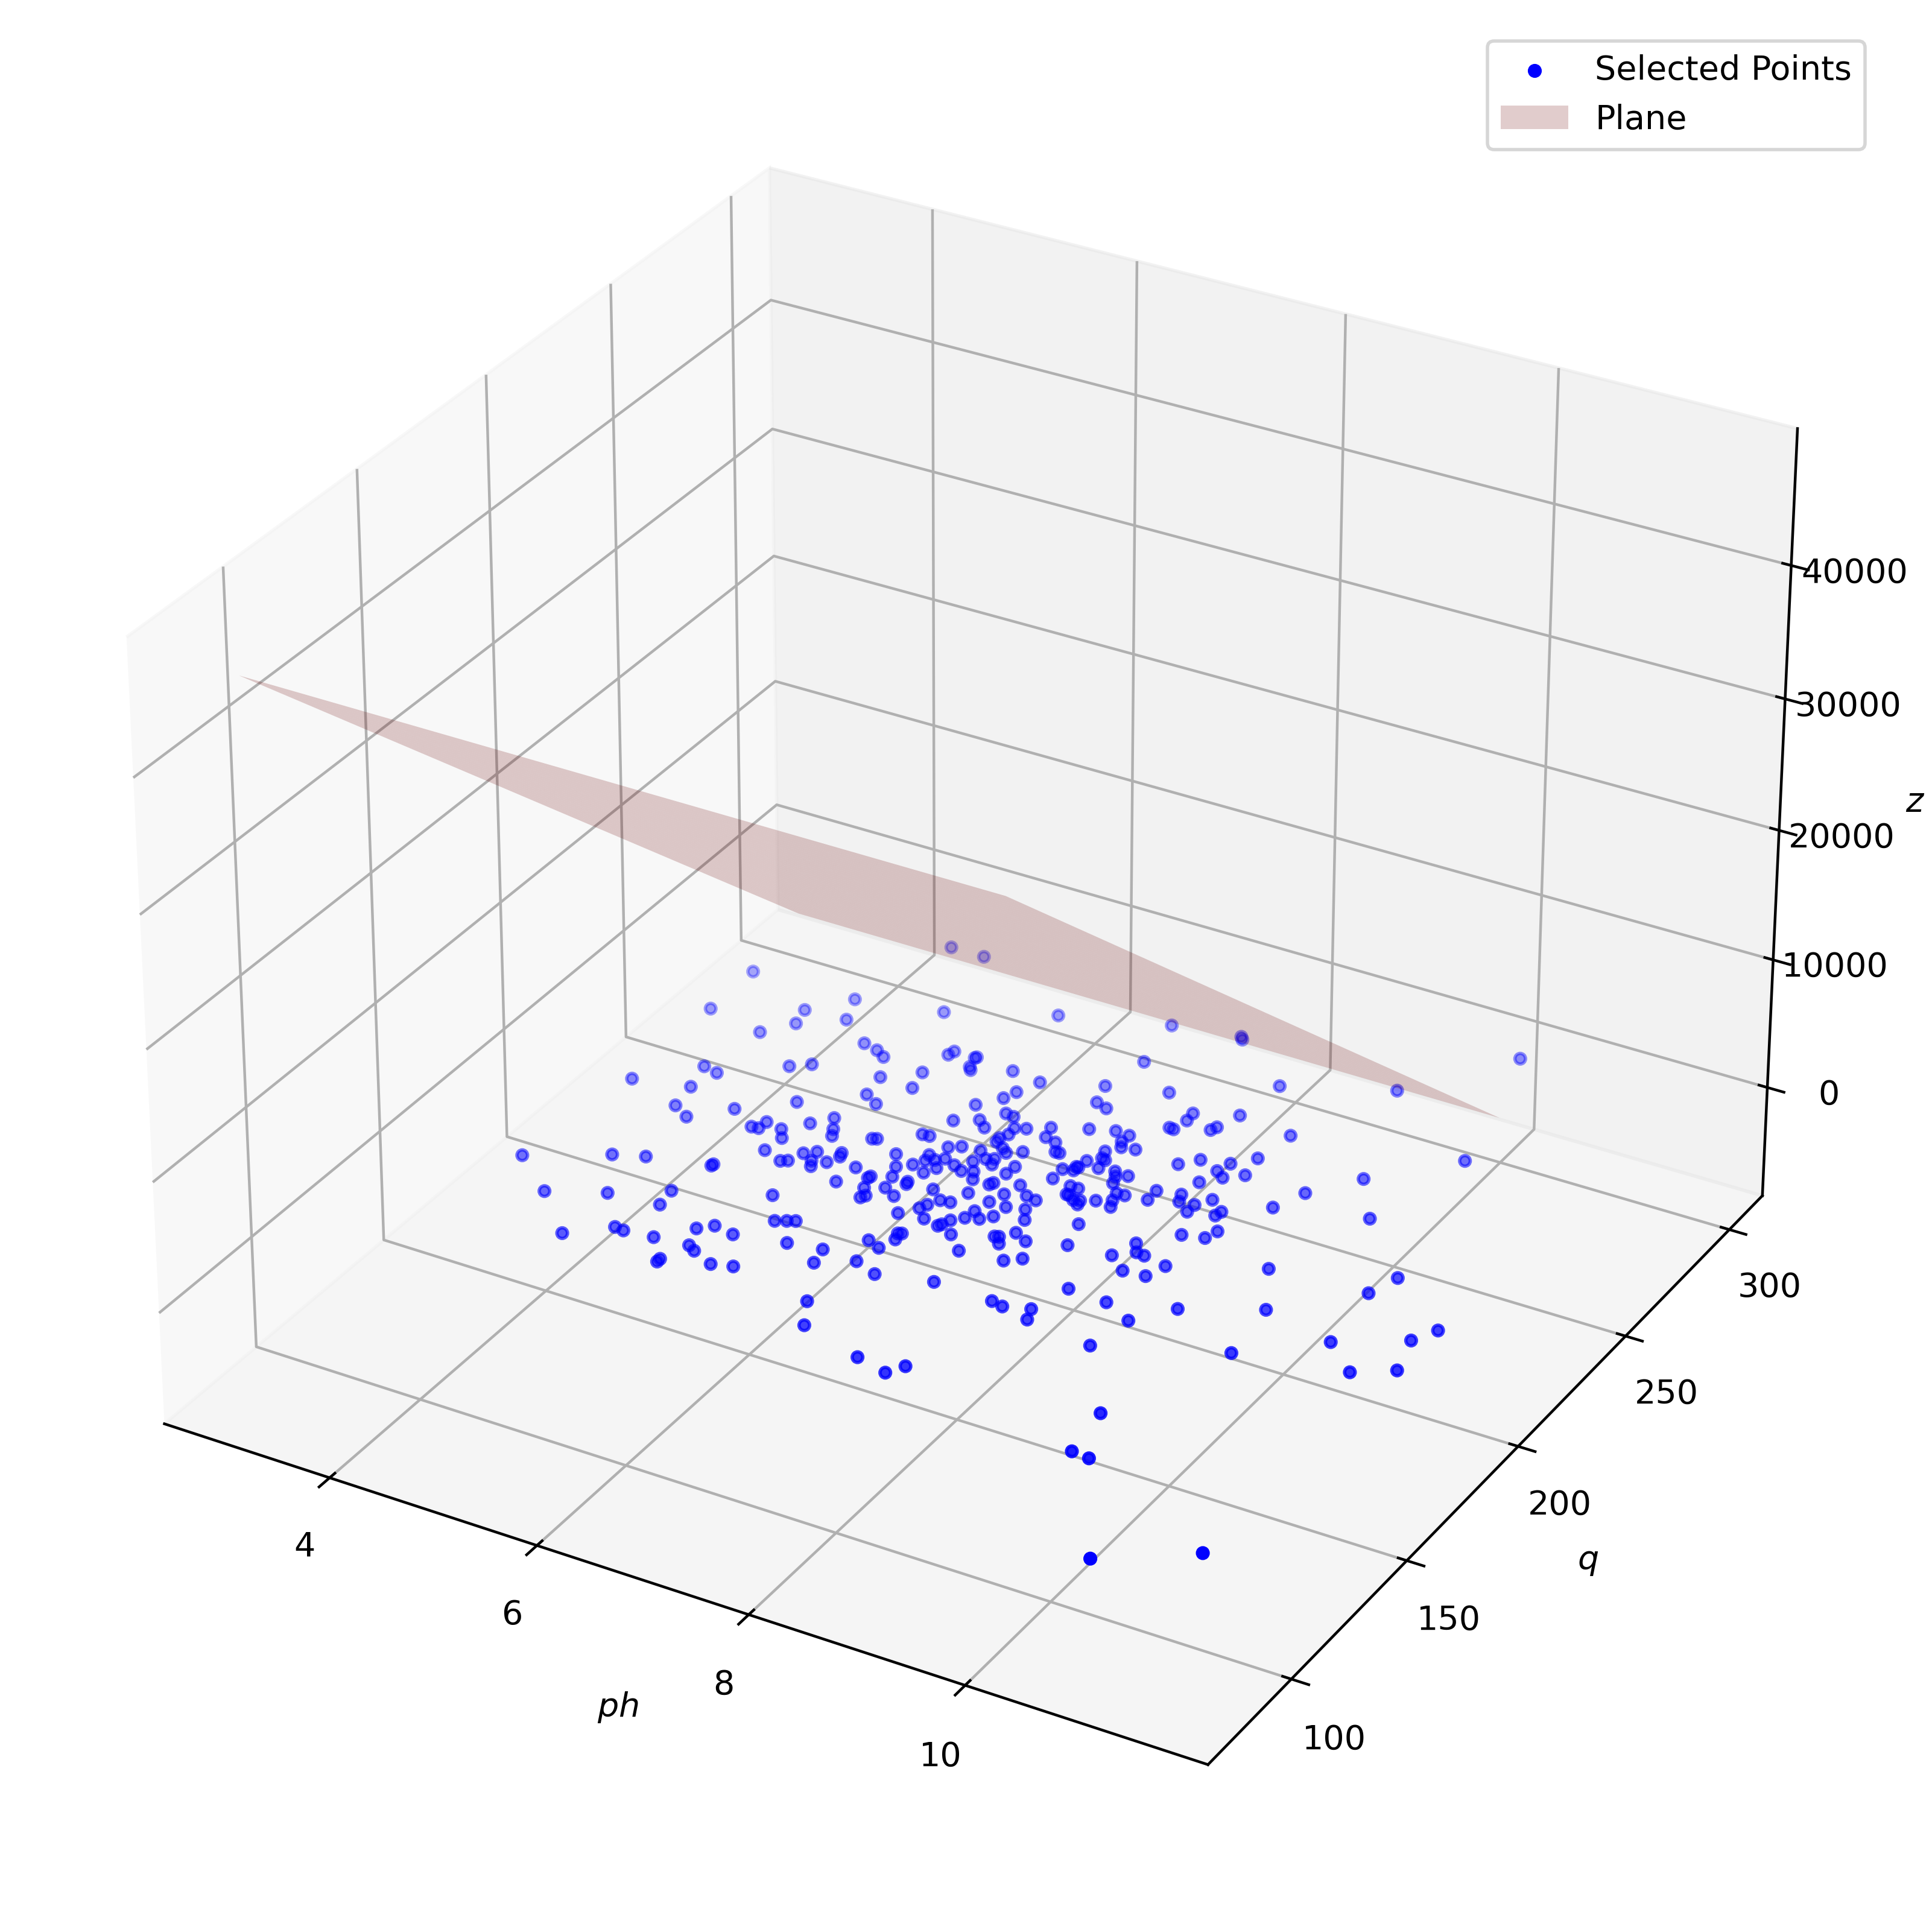

In [18]:
# Grafica de la figura
fig = plt.figure(figsize=(10, 10), dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sample, Y_sample, Z_sample, s=10, c='blue', marker='o', label='Selected Points')

# Definir el punto y el vector normal como arrays
point = np.array([x_point, y_point, z_point])
normal = np.array([x_normal, y_normal, z_normal])

# Calcular el término independiente (d) en la ecuación del plano
d = -point.dot(normal)

# Definir el plano en función de la ecuación del plano
xx, yy = np.meshgrid(range(int(X_sample.min()), int(X_sample.max())), 
                     range(int(Y_sample.min()), int(Y_sample.max())))
z_plane = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# Graficar el plano
ax.plot_surface(xx, yy, z_plane, alpha=0.2, color='red', label='Plane')

ax.set_xlabel('$ph$')
ax.set_ylabel('$q$')
ax.set_zlabel('$z$')

ax.legend()

plt.show()

texto = f'd = {d}'

display(HTML(f"{texto}"))

--------
## **Hypercubes**
---------

In [19]:
# Seleccionar las columnas de features
column_options = features.columns.tolist()

### Hyper-cubes 1 dimension
-------

In [20]:
def plot_data_1D(column, num_points):
    # Obtener los datos de la columna seleccionada
    selected_features = features[column]
    selected_labels = labels[features.index]

    # Tomar la cantidad especificada de puntos
    selected_features = selected_features[:num_points]
    selected_labels = selected_labels[:num_points]

    # Crear la gráfica
    plt.figure(figsize=(10, 10), dpi=400)
    plt.scatter(selected_features, np.zeros_like(selected_features),
                c=['blue' if label == 1 else 'red' for label in selected_labels],
                s=10, alpha=0.5, label='Selected Points')
    plt.title(f'Hyper Cube 1D: {column} - {num_points} points')
    plt.show()

In [21]:
interact(plot_data_1D, 
         column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:'),
         num_points=widgets.IntSlider(min=1, max=len(features), step=1, value=10, description='Points:')
);

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…


### Hyper-cubes 2 dimension
-------

In [22]:
def plot_data_2D(column_1, column_2, num_points):
    # Obtener los datos de las columnas seleccionadas
    selected_features = features[[column_1, column_2]]
    selected_labels = labels[features.index]

    # Tomar la cantidad especificada de puntos
    selected_features = selected_features[:num_points]
    selected_labels = selected_labels[:num_points]

    # Clasificar los puntos 0 y 1
    labels_d2 = np.array(['blue' if i == 1 else 'red' for i in selected_labels])
    
    # Crear la gráfica
    plt.figure(figsize=(10, 10), dpi=400)
    plt.scatter(selected_features[column_1], selected_features[column_2], 
                c=labels_d2, s=10, alpha=0.5, label='Selected Points')
    plt.title('Hyper Cube 2D: ' + column_1 + ' vs ' + column_2 + ' - ' + str(num_points) + ' points')
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()

In [23]:
interact(plot_data_2D, 
         column_1=widgets.Dropdown(options=column_options, value=column_options[0], description='Column 1:'),
         column_2=widgets.Dropdown(options=column_options, value=column_options[1], description='Column 2:'),
         num_points=widgets.IntSlider(min=1, max=len(features), step=1, value=10, description='Points:')
);

interactive(children=(Dropdown(description='Column 1:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'S…

### Hypercube 3 dimensions
------

In [24]:
def plot_data_3D(column_1, column_2, column_3, num_points):
    # Obtener los datos de las columnas seleccionadas
    selected_features = features[[column_1, column_2, column_3]]
    selected_labels = labels[features.index]

    # Tomar la cantidad especificada de puntos
    selected_features = selected_features[:num_points]
    selected_labels = selected_labels[:num_points]

    # Clasificar los puntos 0 y 1
    labels_hy3 = np.array(['blue' if i == 1 else 'red' for i in selected_labels])
    
    # Crear la gráfica
    fig = plt.figure(figsize=(10, 10), dpi=400)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        selected_features.iloc[:, 0],  # Selecciona la primera columna del nuevo array (selected_features) (column_1)
        selected_features.iloc[:, 1],  # Selecciona la segunda columna del nuevo array (selected_features) (column_2)
        selected_features.iloc[:, 2],  # Selecciona la tercera columna del nuevo array (selected_features) (column_3)
        c=labels_hy3,
        cmap='viridis',
    )
    ax.set_title('Hyper cube 3D: ' + column_1 + ' vs ' + column_2 + ' vs ' + column_3 + ' - ' + str(num_points) + ' points')
    ax.set_xlabel(column_1)  # Usa el nombre de la columna seleccionada
    ax.set_ylabel(column_2) 
    ax.set_zlabel(column_3)  
    plt.show()


In [25]:
interact(plot_data_3D, 
         column_1=widgets.Dropdown(options=column_options, value=column_options[0], description='Seleccionar Columna 1:'),
         column_2=widgets.Dropdown(options=column_options, value=column_options[1], description='Seleccionar Columna 2:'),
         column_3=widgets.Dropdown(options=column_options, value=column_options[2], description='Seleccionar Columna 3:'),
         num_points=widgets.IntSlider(min=1, max=len(features), step=1, value=10, description='Cantidad de Puntos:')
);

interactive(children=(Dropdown(description='Seleccionar Columna 1:', options=('ph', 'Hardness', 'Solids', 'Chl…

# **4. Exploration of the Curse of Dimensionality**
------
Let's write a generalized function to find the proportion of outside points to total points for an $n$ dimensional hyper_cube and plot the proportion per dimensionality from 1 to 1000 dimensions.


###### **prop:** Controla la proporción del rango de posiciones aleatorias que se considerará para determinar si un punto está fuera del hipercubo. Un valor más bajo hará que el rango permitido sea más pequeño, mientras que un valor más alto hará que el rango permitido sea más grande.

###### **dism:** Es la cantidad de dimensiones en el conjunto de datos, es decir, el número de columnas.

###### **num:** Representa la cantidad de puntos que se generarán aleatoriamente para realizar el análisis. En este caso, se establece en el 50% del total de puntos (totalPoints * 0.5).

In [26]:
def hyper_cube(dataset, prop=0.5, showBar=True):
    outsidePoints = 0
    totalPoints = len(dataset)
    
    dism = len(dataset.columns)
    num = int(totalPoints * 0.5)

    if showBar:
        barfunc = lambda x: tqdm(x)
    else:
        barfunc = lambda x: x

    for point in barfunc(range(num)):
        for dim in range(dism):
            randPos = np.random.uniform(0, 1)
            if randPos < (1 - prop) / 2 or randPos > 1 - (1 - prop) / 2:
                outsidePoints += 1
                break

    return outsidePoints / totalPoints


x = dimensions

y = percent outside points

In [27]:
df.shape

(2011, 10)

In [28]:
x = range(1, df.shape[1])
y = []

In [29]:
for dim in tqdm(x):
    y.append(hyper_cube(df.iloc[:, :dim + 1], showBar=False))

  0%|          | 0/9 [00:00<?, ?it/s]

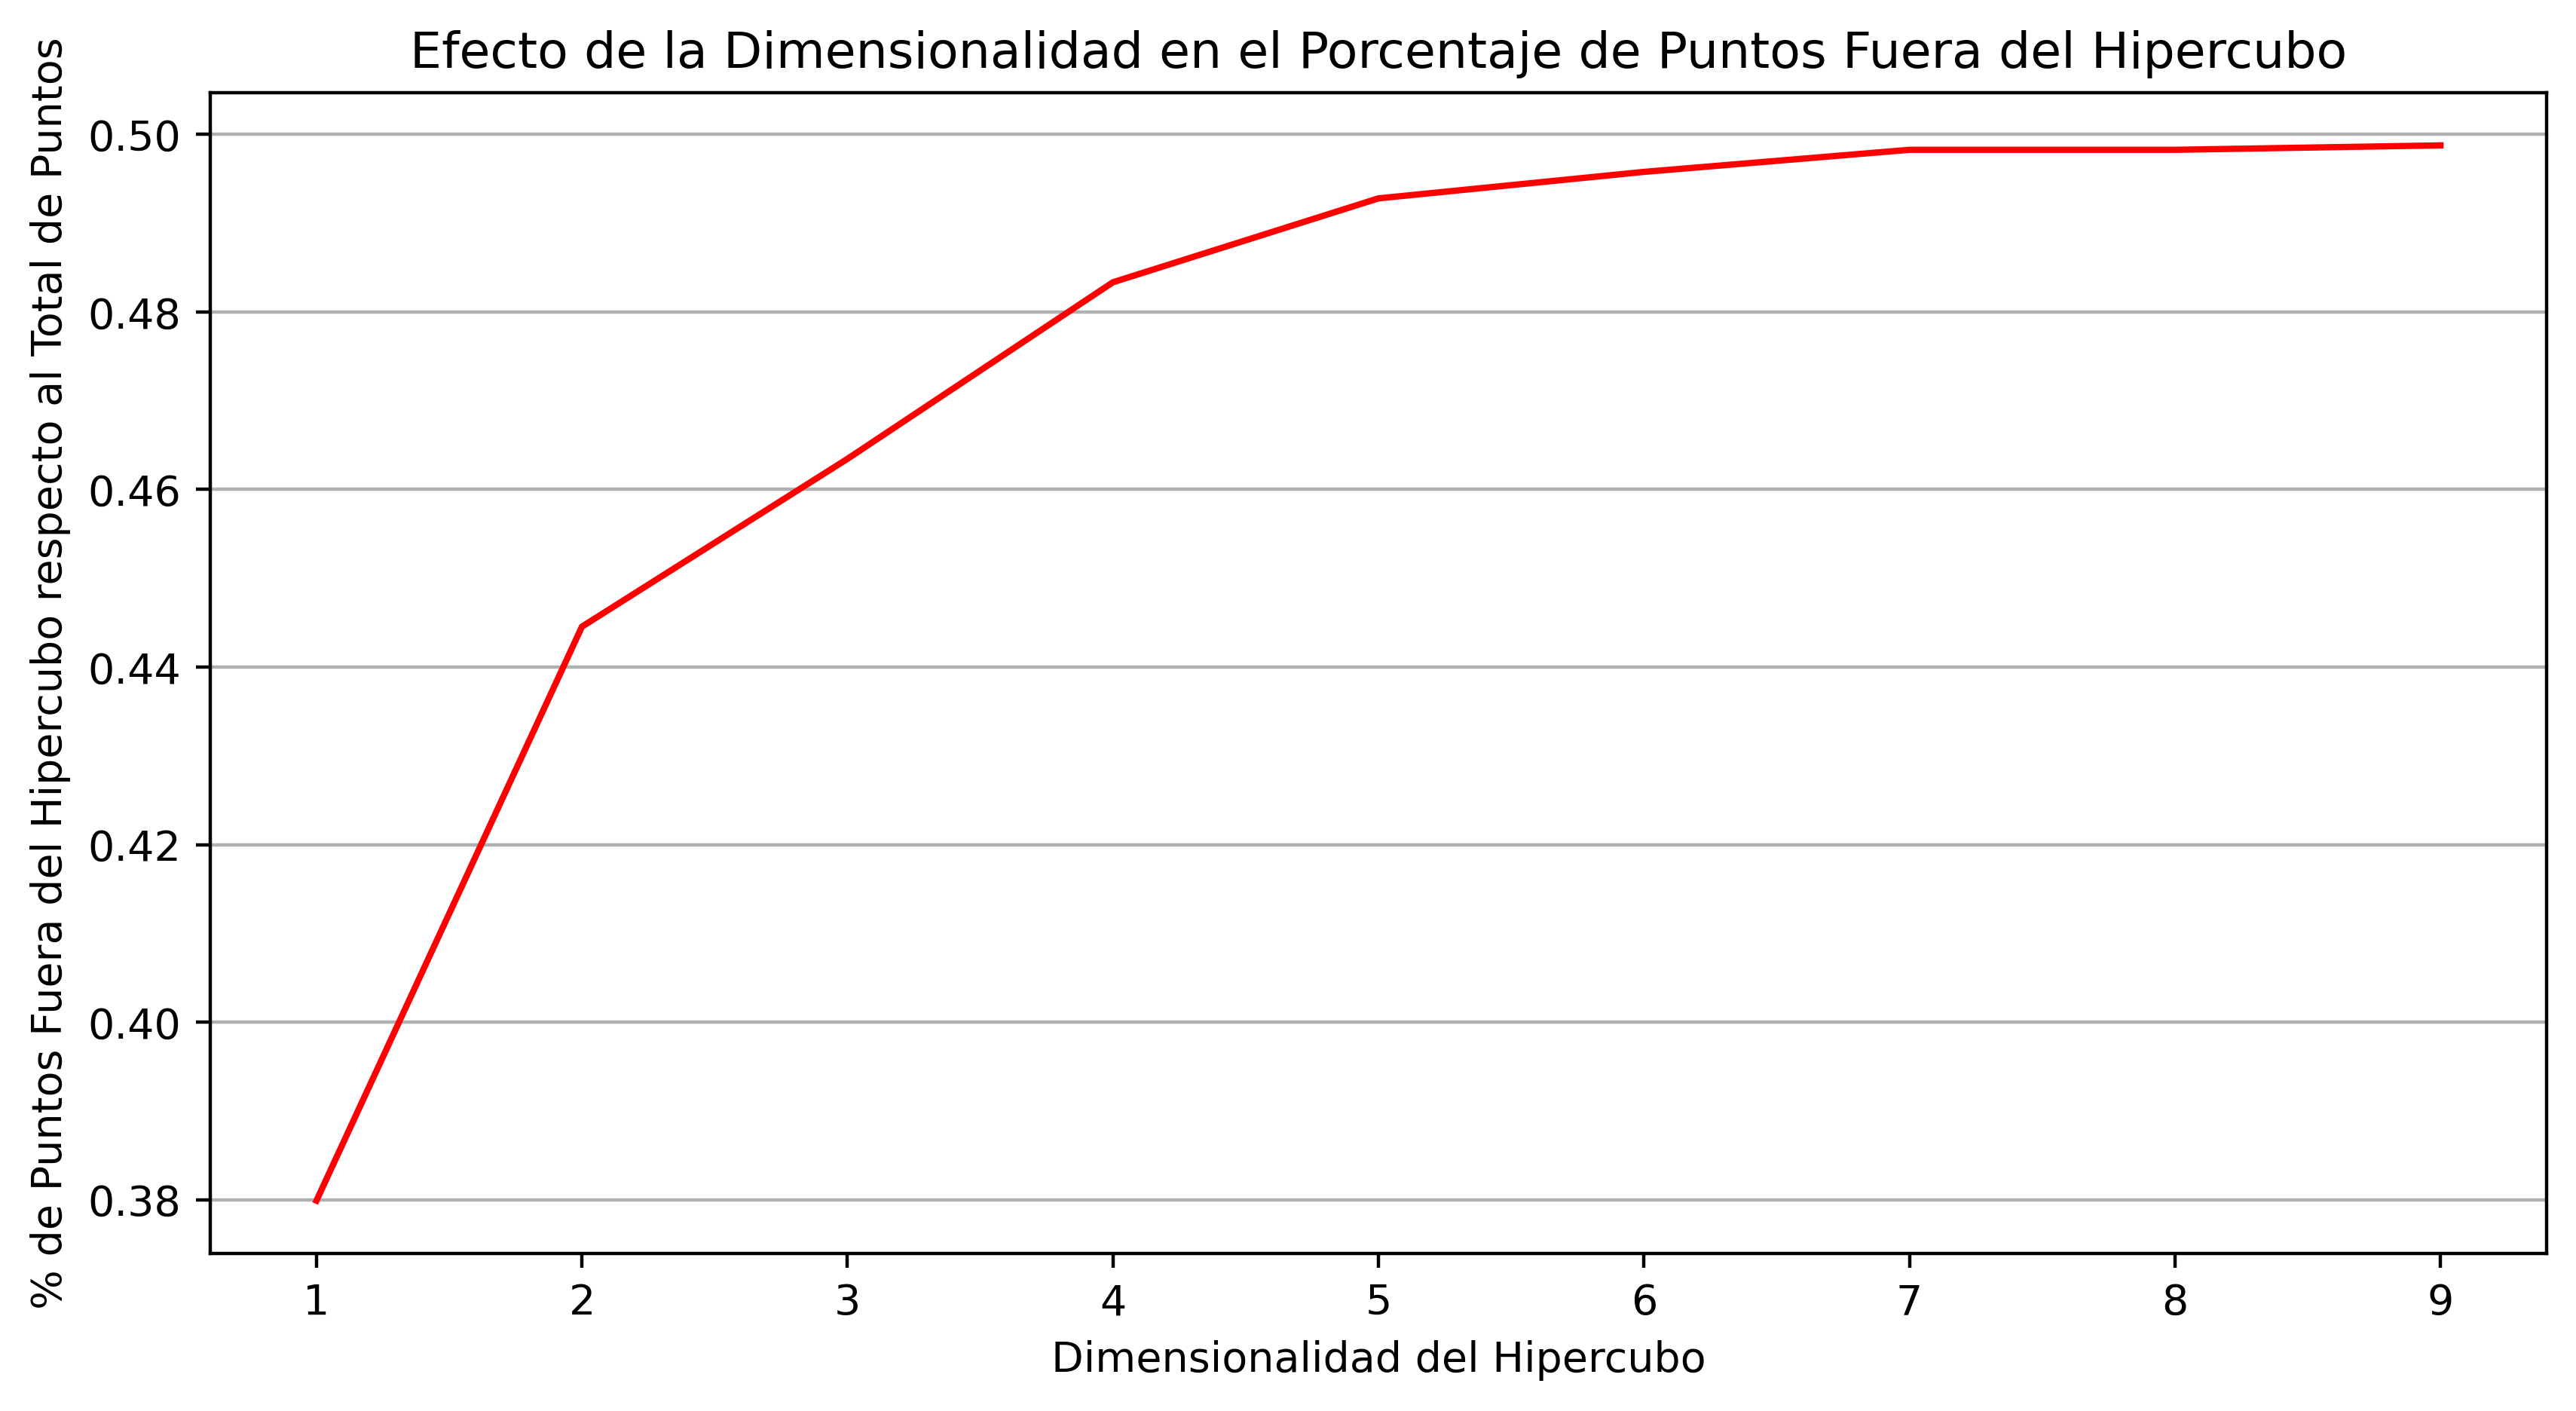

In [30]:
plt.figure(figsize=(10, 5), dpi=400)
plt.plot(x, y, color='red')
plt.ylabel('% de Puntos Fuera del Hipercubo respecto al Total de Puntos')
plt.xlabel('Dimensionalidad del Hipercubo')
plt.title('Efecto de la Dimensionalidad en el Porcentaje de Puntos Fuera del Hipercubo')
axes = plt.gca()
axes.yaxis.grid()
plt.show()

percent_outside_points = hyper_cube(df, showBar=False)
text = f'Porcentaje de puntos fuera del hipercubo: {percent_outside_points:.2%}'

display(HTML(f"{text}"))

----------

Book: The distance between the second longest distance of two points and the longest distance of two points changes to zero as the dimensionality of a hyper_cube increases.

$$labels = √(features) - √(features -1)$$

In [31]:
def distance_points(column):
    # Seleccionar las columnas de features
    random_values = features.sample(n=200)
    features_space = random_values[[column]]
    
    # Ordena de menor a mayor
    features_space = features_space.sort_values(by=column)
    
    # Calcula la distancia entre los puntos 
    labels_space = np.sqrt(features_space[column]) - np.sqrt(features_space[column] - 1)
    
    # Grafica
    plt.figure(figsize=(10, 5), dpi=400)
    plt.plot(features_space[column], labels_space, color='red')
    axes = plt.gca()
    axes.yaxis.grid()
    plt.title(f'{column}')
    plt.ylabel('Distance ($\sqrt{n} - \sqrt{n-1}$)')
    plt.xlabel('Dimensionality ($n$)')
    plt.show()

In [32]:
interact(distance_points, 
         column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:')
);      

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…

# **5. Optimization and Gradient Descent**
-----------

> Necesitar una función de transformación diferente, no se cual es :v

In [33]:
def lost_function_optimization(column):
    # Selection and assignment of values
    features_gradient = np.linspace(features[column].min(), features[column].max(), 100)
    targets = np.sin(features_gradient) + features_gradient**2/10 + 1
    
    # Ascending order of features
    sorted_targets = np.sort(targets)
    sorted_features = features_gradient[np.argsort(targets)]
    
    # Selection of minimum values
    lowest_feature = sorted_features[0]
    lowest_label = sorted_targets[0]
    
    f = lambda x:np.sin(x) + x**2/10 + 1
    
    plt.figure(figsize=(10, 5), dpi=400)
    axes = plt.gca()
    axes.yaxis.grid()

    # Punto de interés
    plt.scatter([lowest_feature], [lowest_label], color='black', marker='x', s=200)

    # Línea roja de la función objetivo
    x = np.linspace(features_gradient.max(), features_gradient.min(), 10)
    
    '''
    Used in the book
    
    dx = [x[i+1]-x[i] for i in range(len(x[:-1]))]
    dy = [f(x)[i+1]-f(x)[i] for i in range(len(f(x)[:-1]))]
    
    is equal to:
    dx = np.diff(x)
    dy = np.diff(f(x))
    '''
    
    dx = np.diff(x)
    dy = np.diff(f(x))
    axes.quiver(x[:-1], 
                f(x)[:-1], 
                dx, 
                dy, 
                angles='xy', 
                scale_units='xy', 
                scale=1,
                linestyle='--', 
                width=0.005, 
                color='red')

    # Gráfico de la función objetivo
    plt.plot(features_gradient, targets, color='black')
    plt.title(f'Optimization of the Loss Function: {column}')
    plt.ylabel('Loss')
    plt.xlabel('Parameter Value')

    plt.show()
    
    

In [34]:
# Display of lost function optimization
interact(
    lost_function_optimization, 
    column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:')    
);

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…

Tracemos varias minimizaciones del descenso de gradiente para la función $\sin x + \frac{x^2}{10} + 1$.

In [35]:
def plot_gd_min(column, learn_rate= 0.5, curr_x=6):
    
    cost = lambda x: np.sin(x) + x**2/10 + 1
    gradient = lambda x: np.cos(x) + 2*x / 10

    x_values = []
    for iteration in range(10):
        x_values.append(curr_x)
        curr_x += -learn_rate * gradient(curr_x)

    features_gradient = np.linspace(features[column].min(), features[column].max(), 100)
    targets = np.sin(features_gradient) + features_gradient**2/10 + 1
   #features_gradient = features_gradient.reshape(-1, 1)

    f = lambda x: np.sin(x) + x**2/10 + 1
#------------------------------
    # Ascending order of features
    sorted_targets = np.sort(targets)
    sorted_features = features_gradient[np.argsort(targets)]
    
    # Selection of minimum values
    lowest_feature = sorted_features[0]
    lowest_label = sorted_targets[0]

    plt.figure(figsize=(10, 5), dpi=400)
    axes = plt.gca()
    axes.yaxis.grid()

    # Punto de interés
    plt.scatter(lowest_feature, lowest_label, color='black', marker='x', s=200)

    x_values = np.array(x_values)
    
    '''
        ([x_values[i+1]-x_values[i] for i in range(len(x_values[:-1]))]),
        ([f(x_values)[i+1]-f(x_values)[i] for i in range(len(f(x_values)[:-1]))])
    '''
    
    dx = np.diff(x_values)
    dy = np.diff(f(x_values))
    
    axes.quiver(x_values[:-1],
                f(x_values)[:-1],
                dx,
                dy,
                angles='xy',
                scale_units='xy',
                scale=1,
                linestyle='--',
                width=0.005,
                color='red')

    plt.plot(features_gradient, targets, color='black')

    plt.ylabel('Loss')
    plt.xlabel('Parameter Value')

    plt.show()

In [36]:
interact(
    plot_gd_min,
    column=widgets.Dropdown(options=column_options, value=column_options[0], description='Column:'),
    learn_rate=widgets.FloatSlider(min=-1, max=1, step=0.01, value=0.1, description='Learning Rate:',),
    curr_x=widgets.FloatSlider(min=-10, max=10, step=0.1, value=3, description='Initial Value:')
);

interactive(children=(Dropdown(description='Column:', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sul…

Trazar un ejemplo de ajuste de regresión lineal simple con descenso de gradiente.

# **6. Metrics and Evaluation**
------------

## **6.1 Example of Regression and Classification**
-----

In [37]:
# Simulación para regresión
y_reg_true = df['ph'] + np.random.normal(0, 5, len(df))  # Ajusta según la columna que quieras predecir
y_reg_pred = df['ph'] + np.random.normal(0, 5, len(df))

In [38]:
# Simulación para clasificación
# En este ejemplo, se asume que 'Potability' es la columna que quieres clasificar
y_class_true = df['Potability']  # Ajusta según la columna que quieras clasificar

In [39]:
# Simulación de predicciones para clasificación (valores de probabilidad)
y_class_pred = np.random.uniform(0, 1, len(df))

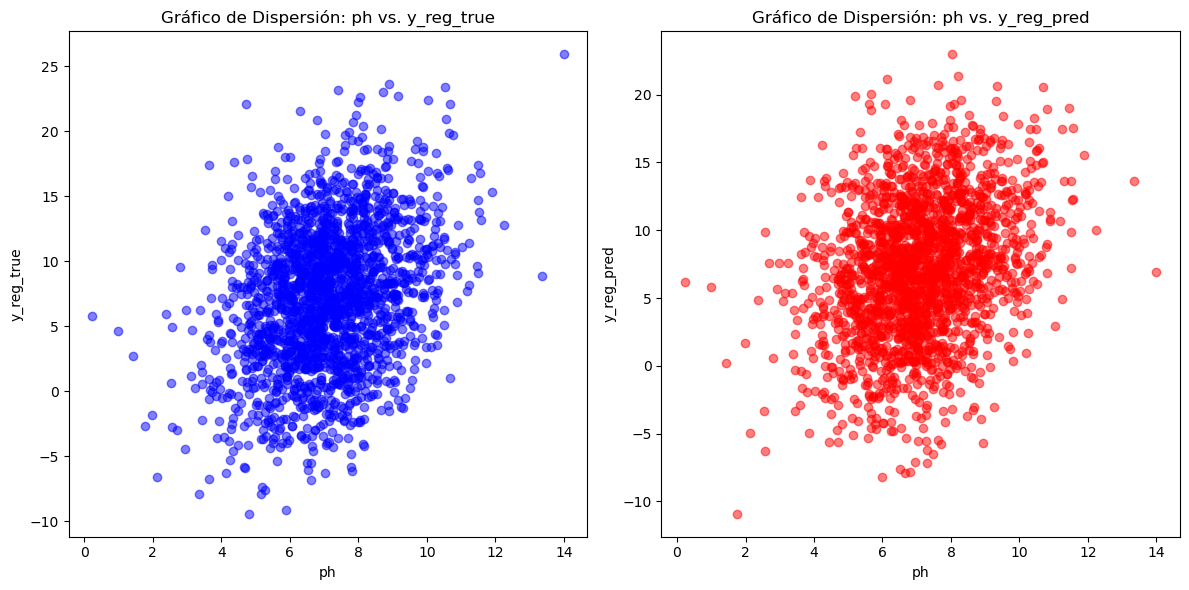

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['ph'], y_reg_true, alpha=0.5, color='blue')
plt.title('Gráfico de Dispersión: ph vs. y_reg_true')
plt.xlabel('ph')
plt.ylabel('y_reg_true')

plt.subplot(1, 2, 2)
plt.scatter(df['ph'], y_reg_pred, alpha=0.5, color='red')
plt.title('Gráfico de Dispersión: ph vs. y_reg_pred')
plt.xlabel('ph')
plt.ylabel('y_reg_pred')

plt.tight_layout()
plt.show()

## **6.2 Mean Absolute Error (MAE)**
______

In [41]:
# Implementation in NumPy
def mean_absolute_error(y_true, y_pred):
    # Check if y_true and y_pred are the same shape
    assert y_pred.shape == y_true.shape
    return np.sum(np.abs(y_true - y_pred)) / len(y_pred)

In [42]:
print(f"Numpy Implementation of MAE: {mean_absolute_error(y_reg_true, y_reg_pred)}")

Numpy Implementation of MAE: 5.593841090117219


In [43]:
# Implementation in Sklearn
from sklearn.metrics import mean_absolute_error

# Usage
print(f"Sklearn Implementation of MAE: {mean_absolute_error(y_reg_true, y_reg_pred)}")

Sklearn Implementation of MAE: 5.593841090117219


## **6.3 Root Mean Squared Error (RMSE)**
---------

In [44]:
print(f"RMSE: {mean_squared_error(y_reg_true, y_reg_pred) ** (1/2)}")

RMSE: 6.997166792431086


## **6.4 Area Under Receiver Operating Characteristics Curve (AUC-ROC)**
-----------

In [45]:
def get_tpr_fpr(y_pred, y_true):
    tp = (y_pred == 1) & (y_true == 1)
    tn = (y_pred == 0) & (y_true == 0)
    fp = (y_pred == 1) & (y_true == 0)
    fn = (y_pred == 0) & (y_true == 1)

    tpr = tp.sum() / (tp.sum() + fn.sum())
    fpr = fp.sum() / (fp.sum() + tn.sum())

    return tpr, fpr

In [46]:
def roc_curve(y_pred, y_true, n_thresholds=15000):
    fpr_thresh = []
    tpr_thresh = []
    for i in range(n_thresholds + 1):
        
        threshold_vector = (y_pred >= i/n_thresholds)
        tpr, fpr = get_tpr_fpr(threshold_vector, y_true)
        fpr_thresh.append(fpr)
        tpr_thresh.append(tpr)
        
    return tpr_thresh, fpr_thresh

In [47]:
# Implementation in Numpy
def area_under_roc_curve(y_true, y_pred):
    fpr, tpr = roc_curve(y_pred, y_true)
    rectangle_roc = 0
    for k in range(len(fpr) - 1):
            rectangle_roc = rectangle_roc + (fpr[k]- fpr[k + 1]) * tpr[k]
    return 1 - rectangle_roc

In [48]:
from sklearn.metrics import roc_auc_score
print(f"Numpy Implementation of ROC-AUC: {area_under_roc_curve(y_class_true, y_class_pred)}")
print(f"Sklearn implementation of ROC-AUC: {roc_auc_score(y_class_true, y_class_pred)}")

Numpy Implementation of ROC-AUC: 0.5069564323879978
Sklearn implementation of ROC-AUC: 0.5069862309905466


## **6.5 Precision and Recall**
----------

In [49]:
# Convert probability values into integers
y_class_pred = np.rint(y_class_pred)

In [50]:
# Precision
# number of correctly classified positive values/number of all predicted positive values
def precision(y_true, y_pred):
    assert y_true.shape == y_pred.shape    
    return ((y_pred == 1) & (y_true == 1)).sum() / y_pred.sum()
print(f"Numpy Precision: {precision(y_class_true, y_class_pred)}")

Numpy Precision: 0.41691542288557215


In [51]:
# Recall
# number of correctly classified positive values/number of all true positive values
def recall(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return ((y_pred == 1) & (y_true == 1)).sum() / y_true.sum()
print(f"Numpy Recall: {recall(y_class_true, y_class_pred)}")

Numpy Recall: 0.5166461159062885


In [52]:
from sklearn.metrics import recall_score, precision_score
print(f"Sklearn Precision {precision_score(y_class_true, y_class_pred)}")
print(f"Sklearn Recall: {recall_score(y_class_true, y_class_pred)}")

Sklearn Precision 0.41691542288557215
Sklearn Recall: 0.5166461159062885


## **6.6 Accuracy**
-------

In [53]:
def accuracy(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    # returns a boolean array(of 1s and 0s) indicating if element of both arrays match
    return np.average(y_true == y_pred)

from sklearn.metrics import accuracy_score

print(f"Numpy Accuracy: {accuracy(y_class_true, y_class_pred)}")
print(f"Sklearn Accuracy: {accuracy_score(y_class_true, y_class_pred)}")

Numpy Accuracy: 0.513674788662357
Sklearn Accuracy: 0.513674788662357


## **6.7 F1 Score**
-----------

In [54]:
# F1 Score
# Harmonic Mean of Precision and Recall

def f1_score(y_true, y_pred):
    return (2*precision(y_true, y_pred)*recall(y_true, y_pred)) / (precision(y_true, y_pred)+recall(y_true, y_pred))

print(f"Numpy Implementation of F1 Score: {f1_score(y_class_true, y_class_pred)}")
    
from sklearn.metrics import f1_score

print(f"Sklearn Implementation of F1 Socre: {f1_score(y_class_true, y_class_pred)}")

Numpy Implementation of F1 Score: 0.46145374449339205
Sklearn Implementation of F1 Socre: 0.46145374449339205


# **7. Algorithms**
----

In [55]:
from sklearn.model_selection import train_test_split
from collections import Counter

## **7.1 K-Nearest Neighbors (KNN)**
______

##### Calcula la distancia de **Minkowski** entre dos vectores x e y con un parámetro de potencia p.

$D(x,y)=(∑ i=1n ∣x i​ −y i​ ∣ p ) 1/p$

In [56]:
def minkowski_distance(x, y, p=4):
    return (np.abs(x - y)**p).sum()**(1/p)

In [57]:
# Selecciona dos filas de tu conjunto de datos para calcular la distancia de Minkowski entre ellas
row_index_1 = 0  # Elige el índice de la primera fila
row_index_2 = 1  # Elige el índice de la segunda fila

In [58]:
# Extrae los valores de las filas seleccionadas
point_1 = df.iloc[row_index_1, :-1].values  # Excluye la última columna (Potability)
point_2 = df.iloc[row_index_2, :-1].values

In [59]:
# Calcula la distancia de Minkowski entre los dos puntos
distance = minkowski_distance(point_1, point_2)

In [60]:
# Imprime el resultado
print(f"Distancia entre la fila {row_index_1} y la fila {row_index_2}: {distance}")

Distancia entre la fila 0 y la fila 1: 4039.431211312388


In [61]:
from sklearn.decomposition import PCA

In [62]:
# Aplica PCA para reducir la dimensionalidad a 2
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df.iloc[:, :-1])


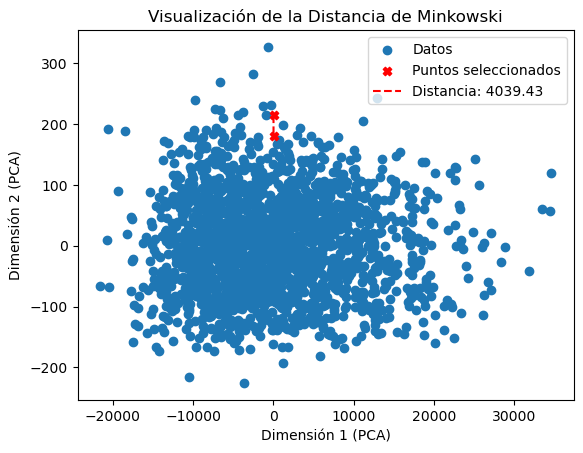

In [63]:
# Grafica el espacio bidimensional con los dos puntos y la distancia
plt.scatter(data_2d[:, 0], data_2d[:, 1], label='Datos')
plt.scatter([point_1[0], point_2[0]], [point_1[1], point_2[1]], c='red', marker='X', label='Puntos seleccionados')
plt.plot([point_1[0], point_2[0]], [point_1[1], point_2[1]], linestyle='--', color='red', label=f'Distancia: {distance:.2f}')
plt.legend()
plt.xlabel('Dimensión 1 (PCA)')
plt.ylabel('Dimensión 2 (PCA)')
plt.title('Visualización de la Distancia de Minkowski')
plt.show()

------

In [64]:
def calculate_distance(X_train, single_test, distance_function):
    distances = []
    
    for single_train in X_train:
        single_distance = distance_function(single_train, single_test)
        distances.append(single_distance)
    
    return distances

In [65]:
# Elige dos índices de filas para calcular la distancia entre ellas
row_index_1 = 0
row_index_2 = 1

In [66]:
# Extrae los valores de las filas seleccionadas
point_1 = df.iloc[row_index_1, :-1].values  # Excluye la última columna (Potability)
point_2 = df.iloc[row_index_2, :-1].values


In [67]:
# Crea el conjunto de entrenamiento (por ejemplo, todo el conjunto de datos excepto las dos filas seleccionadas)
X_train = df.iloc[:, :-1].values


In [68]:
# Calcula las distancias entre las dos filas seleccionadas y el conjunto de entrenamiento usando la función calculate_distance
distances = calculate_distance(X_train, point_1, minkowski_distance)

In [69]:
# Imprime las distancias para cada punto en el conjunto de entrenamiento
print("Distancias para el punto 1:")
print(distances)

# Calcula la distancia de Minkowski entre los dos puntos directamente
direct_distance = minkowski_distance(point_1, point_2)
print(f"\nDistancia directa entre el punto 1 y el punto 2: {direct_distance}")

Distancias para el punto 1:
[0.0, 4039.431211312388, 6730.270343102677, 6731.29913553942, 8346.325750485013, 3466.100809108612, 10434.1969747624, 3287.604086779003, 19046.81734011051, 2022.9145559141748, 3611.9032979534586, 8925.946385984655, 4751.824434617286, 799.7183464678508, 11406.351250552909, 6822.187450802919, 309.32625795508864, 10537.435103502557, 2397.8729478655814, 2733.6562839251296, 2665.3064730285905, 5359.540949993313, 6761.922992740263, 12044.483381235068, 11443.231160590707, 6259.676831724562, 482.2214076241847, 10004.867744044352, 2146.6583234683662, 10097.806779442024, 236.59978914464685, 6761.232739068342, 2305.4485523374196, 10126.382509117735, 1052.9491719300888, 12855.51811799634, 2946.363868076572, 15275.071378074901, 11205.164180493983, 2558.0564364181164, 1011.2568154863177, 15943.750558136955, 2449.633998092892, 9884.982374264506, 12452.2952215722, 5249.565322800853, 1808.9444787931664, 5140.967113431118, 548.175444143833, 9366.054550231234, 6589.63502227563

-----------

In [70]:
def knn_predict_single(distances, y_train, k=7):
    
    # Convert distances to series with the index being the index of y_train
    distances = pd.Series(distances, index=list(range(len(y_train))))
    
    # Sort values and select first K elements while preserving index
    k_neighbors = distances.sort_values()[:k]
    
    # Create list with the lables of each `k_neighbor`
    counter = Counter(y_train[k_neighbors.index])
        
    # Most common label in the list
    prediction = counter.most_common()[0][0]
    
    return prediction

In [71]:
# Elige dos índices de filas para calcular la distancia entre ellas
row_index_1 = 0
row_index_2 = 1


In [72]:
# Extrae las etiquetas de las filas seleccionadas
y_train = df['Potability'].values

In [73]:
# Calcula las distancias entre el primer punto y el conjunto de entrenamiento usando la función calculate_distance
distances = calculate_distance(X_train, point_1, minkowski_distance)

# Utiliza la función knn_predict_single para predecir la etiqueta del punto 1
knn_prediction = knn_predict_single(distances, y_train)

In [74]:
# Imprime la predicción
print(f"Predicción para el punto 1: {knn_prediction}")

Predicción para el punto 1: 1


------